<a href="https://colab.research.google.com/github/antonyYG/predecir_numero_escribir/blob/main/Predecir_numero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "keras==2.15.0" tensorflowjs

In [2]:
import tensorflow_datasets as tfds

In [4]:
(ds_train,ds_test), ds_info = tfds.load("mnist", split=["train", "test"], as_supervised=True, with_info=True)
print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.S16VCU_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.S16VCU_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Bu

In [5]:
import tensorflow as tf

def normalize_img(image, label):
    """Escalar de [0,255] → [0,1]"""
    return tf.cast(image, tf.float32) / 255.0, label

ds_train = ds_train.map(normalize_img).batch(32).shuffle(1000)
ds_test  = ds_test.map(normalize_img).batch(32)


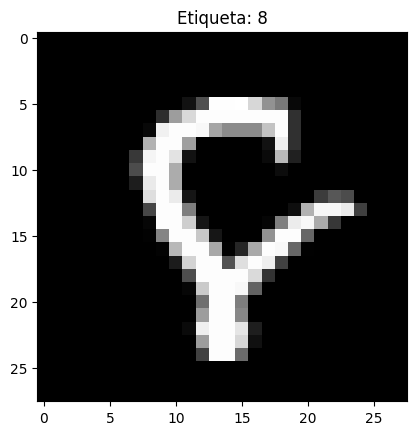

In [6]:
import matplotlib.pyplot as plt

for image, label in ds_train.take(1):
    plt.imshow(image[0].numpy().squeeze(), cmap="gray")
    plt.title(f"Etiqueta: {label[0].numpy()}")
    plt.show()


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")   # 10 clases (0–9)
])

In [8]:
# Paso 5: compilar el modelo
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [9]:
# Paso 6: entrenar
history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
1875/1875 [==============================] - 61s 30ms/step - loss: 0.1236 - accuracy: 0.9617 - val_loss: 0.0500 - val_accuracy: 0.9846
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0323 - val_accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0386 - val_accuracy: 0.9873
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0304 - val_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0369 - val_accuracy: 0.9891


In [10]:
model.evaluate(ds_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0369 - accuracy: 0.9891


[0.036891985684633255, 0.9890999794006348]

In [11]:
model.save("mi_modelo.keras")

In [14]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "mi_modelo.js")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
